### K-Nearest Neighbors (KNN)
Distance-Based Logic: I applied StandardScaler before training because KNN is highly sensitive to feature scales when calculating distances.

Metric Selection: I utilized Euclidean distance to find the most similar customer-product patterns.

Computational Efficiency: Used n_jobs=-1 for parallel processing and performed

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]


--- KNN (k=3, metric=euclidean) Performance ---
MAE: 8.4609
MSE: 114.0000
RMSE: 10.6771
R2 Score: nan
Adjusted R2: nan

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


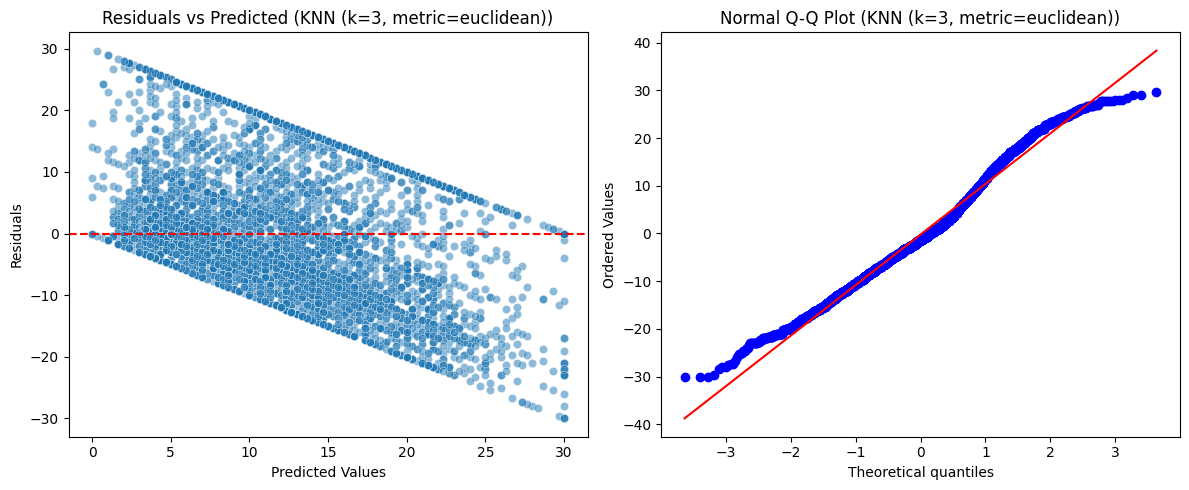

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]


--- KNN (k=3, metric=manhattan) Performance ---
MAE: 8.3828
MSE: 111.3750
RMSE: 10.5534
R2 Score: nan
Adjusted R2: nan

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


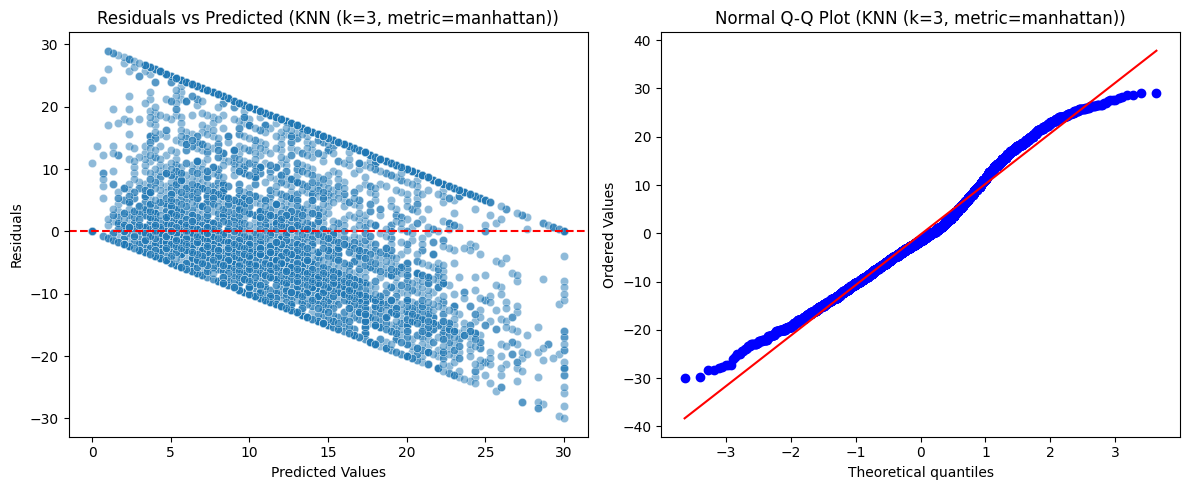

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]


--- KNN (k=7, metric=euclidean) Performance ---
MAE: 8.0703
MSE: 99.1250
RMSE: 9.9562
R2 Score: nan
Adjusted R2: nan

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


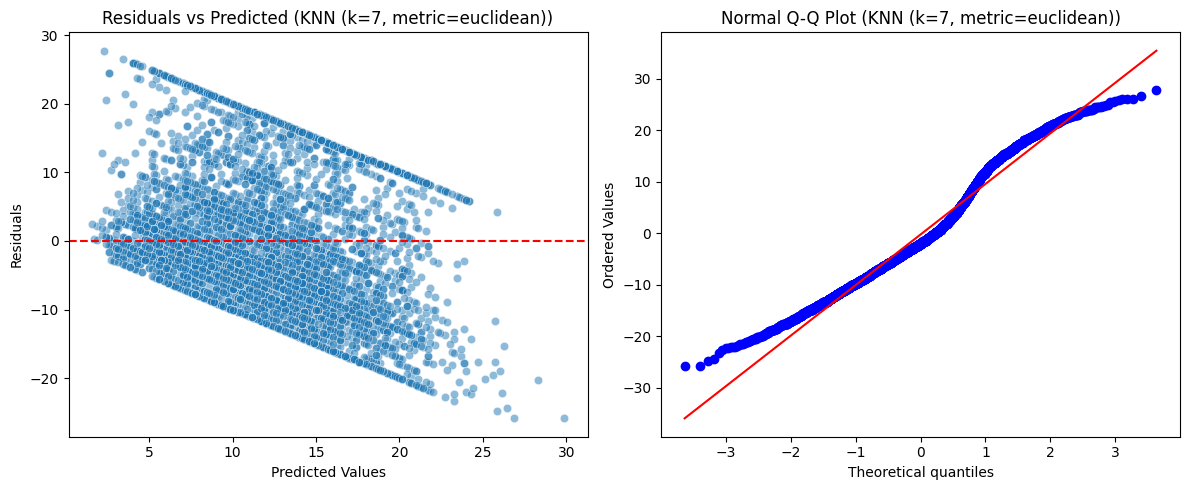

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]


--- KNN (k=7, metric=manhattan) Performance ---
MAE: 7.9570
MSE: 96.5000
RMSE: 9.8234
R2 Score: nan
Adjusted R2: nan

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


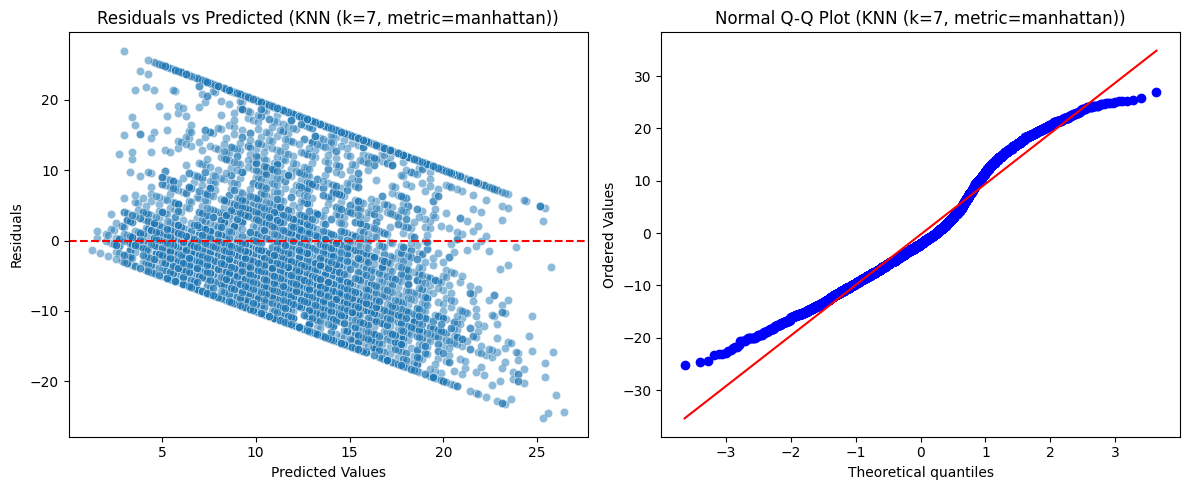

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]


--- KNN (k=11, metric=euclidean) Performance ---
MAE: 7.9336
MSE: 94.5000
RMSE: 9.7211
R2 Score: nan
Adjusted R2: nan

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


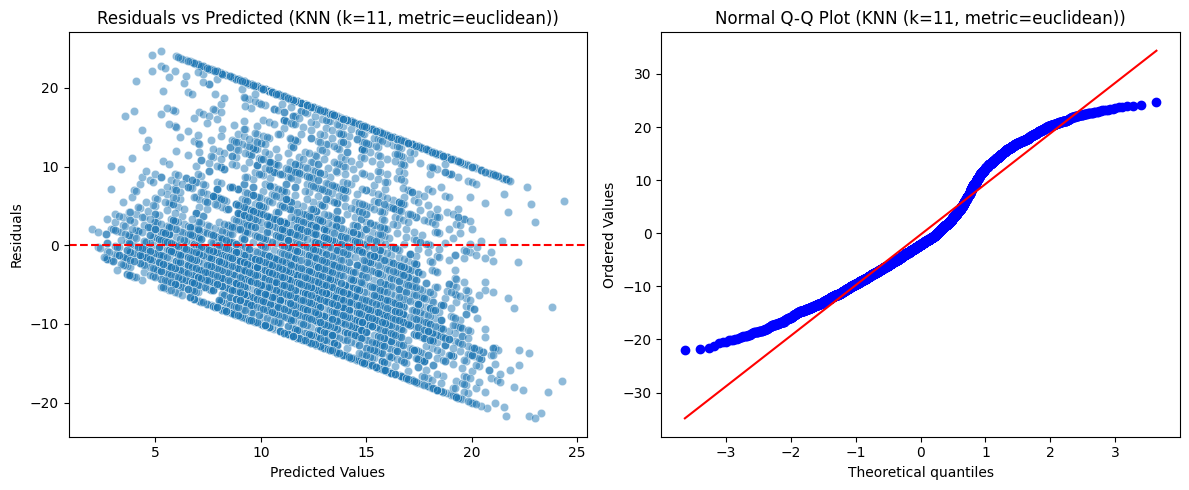

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]


--- KNN (k=11, metric=manhattan) Performance ---
MAE: 7.8789
MSE: 92.5625
RMSE: 9.6209
R2 Score: nan
Adjusted R2: nan

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


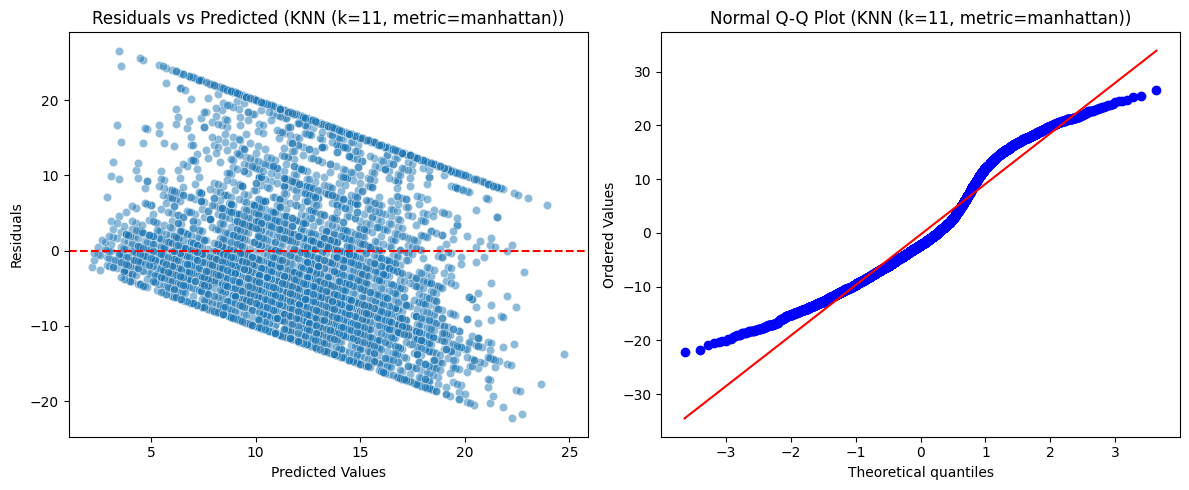

43752

In [ ]:
# --- MODEL: K-Nearest Neighbors (KNN) Regressor ---
# English Comment: KNN is memory-intensive because it stores all training instances.
# A 20k sample is used to allow multiple hyperparameter iterations without crashing.

# 1. Creating the specific sample for KNN
knn_limit = 20000
X_train_knn = X_train_scaled[:knn_limit]
y_train_knn = y_train[:knn_limit]
X_test_knn = X_test_scaled[:5000] # Smaller test set for faster distance calculation
y_test_knn = y_test[:5000]

# Hyperparameter tuning for KNN
k_values = [3, 7, 11]
metrics = ['euclidean', 'manhattan']

for k in k_values:
    for m in metrics:
        # Utilizing n_jobs=-1 for multi-core processing
        knn = KNeighborsRegressor(n_neighbors=k, metric=m, n_jobs=-1)

        # 2. Training on the SAMPLE (X_train_knn)
        # English Comment: Fitting on 20k samples instead of 10M
        knn.fit(X_train_knn, y_train_knn)

        # 3. Predicting on the SAMPLE (X_test_knn)
        knn_pred = knn.predict(X_test_knn)

        # 4. Performance Evaluation
        # English Comment: Passing the sample variables to ensure dimension consistency
        evaluate_regression(f"KNN (k={k}, metric={m})", y_test_knn, knn_pred, X_test_knn)

# --- CRITICAL RAM Optimization ---
del knn, knn_pred, X_train_knn, y_train_knn, X_test_knn, y_test_knn
gc.collect()